In [1]:
import cv2

import numpy as np
import pandas as pd
from joblib import load, dump

import matplotlib.pyplot as plt
import matplotlib.animation as animation
from matplotlib.animation import FuncAnimation
from IPython.display import HTML
%matplotlib inline

# keras
np.random.seed(13)
from keras.models import Sequential
from keras.layers import (Dense, Embedding, Reshape, Activation, 
                          SimpleRNN, LSTM, Convolution1D, 
                          MaxPooling1D, Dropout, Bidirectional)
from keras.utils import np_utils
from keras.utils.data_utils import get_file
from keras.preprocessing import sequence
from keras.optimizers import SGD, RMSprop
from keras.callbacks import TensorBoard
from keras.models import load_model

nPoints = 18

KEYPOINTS = ['Nose', 'Neck', 'R-Sho', 'R-Elb', 'R-Wr', 'L-Sho', 
                    'L-Elb', 'L-Wr', 'R-Hip', 'R-Knee', 'R-Ank', 'L-Hip', 
                    'L-Knee', 'L-Ank', 'R-Eye', 'L-Eye', 'R-Ear', 'L-Ear']

POSE_PAIRS = [[1,2], [1,5], [2,3], [3,4], [5,6], [6,7],
              [1,8], [8,9], [9,10], [1,11], [11,12], [12,13],
              [1,0], [0,14], [14,16], [0,15], [15,17],
              [2,17], [5,16]]

POSE_PAIRS_MOD = [[1,2], [1,5], [2,3], [3,4], [5,6], [6,7],
              [1,8], [8,9], [9,10], [1,11], [11,12], [12,13],
              [1,0], [8,11]]

def plotSinglePose(posePoint):
        '''
        Function to plot the MNIST data on a grid of NxN
        '''
        plt.rcParams['figure.figsize'] = [30, 15]
        #ims = []
        #fig = plt.figure()
        
        imgArray = np.ones((360, 640))
        plt.imshow(imgArray, cmap=plt.cm.Greys, interpolation = 'nearest')
        #ims.append([im])
        plt.axis('off')
        
        for pair in POSE_PAIRS:
            # Checking just xcoord for valid point is enough
            valid_pt1 = (posePoint[pair[0]][0] != -1)
            valid_pt2 = (posePoint[pair[1]][0] != -1)
            if valid_pt1 and valid_pt2:
                xs = [posePoint[pair[0]][0], posePoint[pair[1]][0]]
                ys = [posePoint[pair[0]][1], posePoint[pair[1]][1]]
                plt.plot(xs, ys,'ko-', linewidth=2)
                
        #ani = animation.ArtistAnimation(fig, ims, interval=50, blit=True,
        #                        repeat_delay=1000)
        plt.show()

def plotSinglePose_mod(posePoint):
        '''
        Function to plot the MNIST data on a grid of NxN
        '''
        plt.rcParams['figure.figsize'] = [30, 15]
        #ims = []
        #fig = plt.figure()
        
        imgArray = np.ones((360, 640))
        plt.imshow(imgArray, cmap=plt.cm.Greys, interpolation = 'nearest')
        #ims.append([im])
        plt.axis('off')
        with plt.style.context('Solarize_Light2'):
            for pair in POSE_PAIRS_MOD:
                # Checking just xcoord for valid point is enough
                valid_pt1 = (posePoint[pair[0]][0] != -1)
                valid_pt2 = (posePoint[pair[1]][0] != -1)
                if valid_pt1 and valid_pt2:
                    xs = [posePoint[pair[0]][0], posePoint[pair[1]][0]]
                    ys = [posePoint[pair[0]][1], posePoint[pair[1]][1]]
                    plt.plot(xs, ys,'ko-', linewidth=2)
                
        #ani = animation.ArtistAnimation(fig, ims, interval=50, blit=True,
        #                        repeat_delay=1000)
        plt.show()
#def getVideoPoses(pose_points, video_output_file):
    
    
        
def flat_to_pose(flatPose):
    pose_dim = flatPose.reshape((-1, 2))
    
    return {i:pose_dim[i].tolist() for i in range(0, len(pose_dim))}
    

pose_data_file = "../data/frames/forRNN_pose_by_daner.out"
pose_data_by_dancer = load(pose_data_file)

Using TensorFlow backend.
//anaconda3/envs/metis/lib/python3.7/site-packages/tensorflow/python/framework/dtypes.py:526: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
//anaconda3/envs/metis/lib/python3.7/site-packages/tensorflow/python/framework/dtypes.py:527: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
//anaconda3/envs/metis/lib/python3.7/site-packages/tensorflow/python/framework/dtypes.py:528: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
//anaconda3/envs/metis/lib/python3.7/site-packages/tenso

In [ ]:
# For reference
72
Sequence 1 has 749 frames
Sequence 2 has 690 frames
Sequence 3 has 653 frames
Sequence 4 has 1003 frames
Sequence 5 has 854 frames
Sequence 6 has 629 frames
Sequence 7 has 575 frames
Sequence 8 has 809 frames
Sequence 9 has 22 frames
Sequence 10 has 766 frames
Sequence 11 has 1 frames
Sequence 12 has 619 frames
Sequence 13 has 47 frames
Sequence 14 has 699 frames
Sequence 15 has 78 frames
Sequence 16 has 566 frames
Sequence 17 has 907 frames
Sequence 18 has 43 frames
Sequence 19 has 681 frames
Sequence 20 has 112 frames
Sequence 21 has 465 frames
Sequence 22 has 200 frames
Sequence 23 has 164 frames
Sequence 24 has 509 frames
Sequence 25 has 1 frames
Sequence 26 has 642 frames
Sequence 27 has 664 frames
Sequence 28 has 668 frames
Sequence 29 has 887 frames
Sequence 30 has 809 frames
Sequence 31 has 1080 frames
Sequence 32 has 666 frames
Sequence 33 has 657 frames
Sequence 34 has 819 frames
Sequence 35 has 663 frames
Sequence 36 has 728 frames
Sequence 37 has 885 frames
Sequence 38 has 41 frames
Sequence 39 has 535 frames
Sequence 40 has 68 frames
Sequence 41 has 761 frames
Sequence 42 has 75 frames
Sequence 43 has 475 frames
Sequence 44 has 224 frames
Sequence 45 has 406 frames
Sequence 46 has 566 frames
Sequence 47 has 222 frames
Sequence 48 has 738 frames
Sequence 49 has 792 frames
Sequence 50 has 761 frames
Sequence 51 has 130 frames
Sequence 52 has 447 frames
Sequence 53 has 585 frames
Sequence 54 has 357 frames
Sequence 55 has 508 frames
Sequence 56 has 1 frames
Sequence 57 has 61 frames
Sequence 58 has 667 frames
Sequence 59 has 156 frames
Sequence 60 has 783 frames
Sequence 61 has 564 frames
Sequence 62 has 201 frames
Sequence 63 has 474 frames
Sequence 64 has 616 frames
Sequence 65 has 586 frames
Sequence 66 has 730 frames
Sequence 67 has 361 frames
Sequence 68 has 384 frames
Sequence 69 has 374 frames
Sequence 70 has 89 frames
Sequence 71 has 763 frames
Sequence 72 has 109 frames

MovieWriter imagemagick unavailable; trying to use <class 'matplotlib.animation.PillowWriter'> instead.


(1, 600, 36)


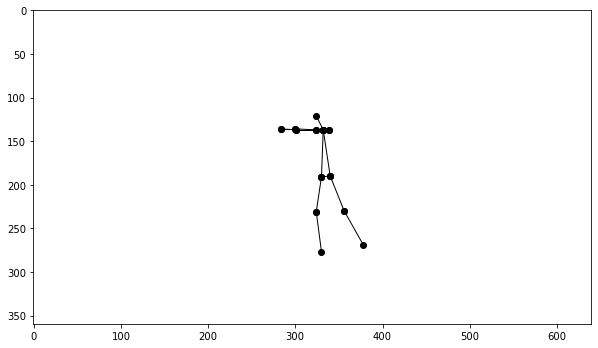

In [3]:
#
# 80% prob. that Sequence 41 (dance 40) is the first female performer (L5mqL7ADEsY.mp4)
#
#

no_of_frames = 600
d = 40 #np.random.randint(31, 39)
p = np.random.randint(0, len(pose_data_by_dancer[d]))
x = np.array([pose_data_by_dancer[d][0:no_of_frames]])

print(x.shape)
#plt.rcParams['figure.figsize'] = [30, 15]
#plotSinglePose_mod(flat_to_pose(x))
                             
plt.rcParams['figure.figsize'] = [10, 10]                              
fig = plt.figure()
ax = plt.axes(xlim=(0, 640), ylim=(0, 360))
                              
def animate(i):
    ax.clear()
    pose = x[0][i].reshape((-1, 2))
    #print(pose)
    imgArray = np.ones((360, 640))
    ax.imshow(imgArray, cmap=plt.cm.Greys, interpolation = 'nearest')
    for pair in POSE_PAIRS_MOD:
        # Checking just xcoord for valid point is enough
        valid_pt1 = (pose[pair[0]][0] != -1)
        valid_pt2 = (pose[pair[1]][0] != -1)
        if valid_pt1 and valid_pt2:
            xs = [pose[pair[0]][0], pose[pair[1]][0]]
            ys = [pose[pair[0]][1], pose[pair[1]][1]]
            ax.plot(xs, ys,'ko-', linewidth=1, markersize = 5)                         

anim = FuncAnimation(fig, animate, frames=no_of_frames, interval=125)
anim
anim.save('../data/viz/FirstFemaleDancer.gif', writer='imagemagick')

https://towardsdatascience.com/animations-with-matplotlib-d96375c5442c